<a href="https://colab.research.google.com/github/DaniloRiver/Seminario-de-Investigacion-UNAH/blob/main/Arbol_de_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminares

In [1]:
#Librerias a Utilizar
#!pip install pycaret==2.2.3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from pycaret.datasets import get_data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

from sklearn.metrics import precision_recall_curve,f1_score,auc
from sklearn.decomposition import PCA
from sklearn.model_selection import (cross_val_score,cross_val_predict,KFold)



import warnings
warnings.filterwarnings("ignore")

In [36]:
# Cargando el Dataset Diabetes
url="https://raw.githubusercontent.com/DaniloRiver/Seminario-de-Investigacion-UNAH/main/diabetes.csv"
Diabetes= pd.read_csv(url)
Diabetes=Diabetes[:200]
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
# Preparando las variables X, y del modelo  X=Matriz de Predictores , y= variable de resultados  1: con diabetes , 0: sin diabetes
variables_evaluadas=['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']
#variables_evaluadas=['Glucose', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure', 'Age','Insulin']
X=Diabetes[variables_evaluadas]
y=Diabetes.Outcome
Diabetes.shape

(200, 9)

In [38]:
def plot_2d_space(X, y, label='default'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

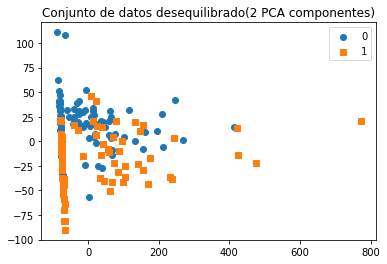

In [39]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plot_2d_space(X_pca, y, 'Conjunto de datos desequilibrado(2 PCA componentes)')

#Under-sampling: enlaces de Tomek

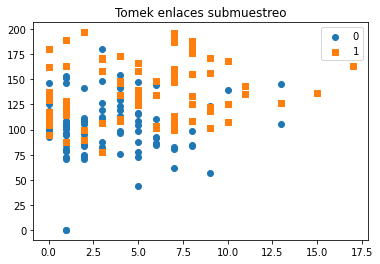

In [40]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X, y)

plot_2d_space(X_tl, y_tl, 'Tomek enlaces submuestreo')

In [41]:
# implementacion de algoritmo de entrenamiento conjunto de prueba del 25% sobre el total del dataset, algoritmo de optimizacion:
# El "lbfgs" es un algoritmo de optimización que se aproxima al algoritmo de Broyden-Fletcher-Goldfarb-Shanno ,que pertenece a los métodos cuasi-Newton. 
#"lbfgs" se utiliza por defecto por su robustez.

X_train,X_test,y_train,y_test= train_test_split(X_tl,y_tl,test_size= 0.20,random_state=1)

In [42]:
Arbol0=DecisionTreeClassifier(max_depth=5,random_state=1)
Arbol0.fit(X_test,y_test)
y_pred= Arbol0.predict(X_test)

In [43]:
#prediciendo los datos de prueba en base al modelo creado 
y_pred=Arbol0.predict(X_test)
#Matriz de confusion 
Matriz_confusion= confusion_matrix(y_test,y_pred)
print(Matriz_confusion)
print(classification_report(y_test,y_pred))

[[23  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        13

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#Under-sampling: Cluster Centroids 
Esta técnica realiza un submuestreo mediante la generación de centroides basados en métodos de agrupación. Los datos se agruparán previamente por similitud, con el fin de preservar la información.

In [44]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X, y)


In [45]:
# implementacion de algoritmo de entrenamiento conjunto de prueba del 25% sobre el total del dataset, algoritmo de optimizacion:
# El "lbfgs" es un algoritmo de optimización que se aproxima al algoritmo de Broyden-Fletcher-Goldfarb-Shanno ,que pertenece a los métodos cuasi-Newton. 
#"lbfgs" se utiliza por defecto por su robustez.

X_train,X_test,y_train,y_test= train_test_split(X_cc,y_cc,test_size= 0.20,random_state=1)

In [46]:
Arbol=DecisionTreeClassifier(max_depth=5,random_state=1)
Arbol.fit(X_test,y_test)
y_pred= Arbol.predict(X_test)

In [47]:
#prediciendo los datos de prueba en base al modelo creado 
y_pred=Arbol.predict(X_test)
#Matriz de confusion 
Matriz_confusion= confusion_matrix(y_test,y_pred)
print(Matriz_confusion)
print(classification_report(y_test,y_pred))

[[15  0]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#ADASYN

In [48]:
from imblearn.over_sampling import ADASYN

X_resampled, y_resampled = ADASYN(random_state=123).fit_resample(X, y)

In [49]:
# implementacion de algoritmo de entrenamiento conjunto de prueba del 25% sobre el total del dataset, algoritmo de optimizacion:
# El "lbfgs" es un algoritmo de optimización que se aproxima al algoritmo de Broyden-Fletcher-Goldfarb-Shanno ,que pertenece a los métodos cuasi-Newton. 
#"lbfgs" se utiliza por defecto por su robustez.

X_train,X_test,y_train,y_test= train_test_split(X_resampled,y_resampled,test_size= 0.20,random_state=1)

In [50]:
Arbol1=DecisionTreeClassifier(max_depth=5,random_state=1)
Arbol1.fit(X_test,y_test)
y_pred= Arbol1.predict(X_test)

In [51]:
#prediciendo los datos de prueba en base al modelo creado 
y_pred=Arbol1.predict(X_test)
#Matriz de confusion 
Matriz_confusion= confusion_matrix(y_test,y_pred)
print(Matriz_confusion)
print(classification_report(y_test,y_pred))

[[27  0]
 [ 0 22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        22

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49





#Over-sampling seguido por under-sampling



In [52]:
from imblearn.combine import SMOTEENN

X_resampled1, y_resampled1 = SMOTEENN(random_state=123).fit_resample(X, y)

In [53]:
# implementacion de algoritmo de entrenamiento conjunto de prueba del 25% sobre el total del dataset, algoritmo de optimizacion:
# El "lbfgs" es un algoritmo de optimización que se aproxima al algoritmo de Broyden-Fletcher-Goldfarb-Shanno ,que pertenece a los métodos cuasi-Newton. 
#"lbfgs" se utiliza por defecto por su robustez.

X_train,X_test,y_train,y_test= train_test_split(X_resampled1,y_resampled1,test_size= 0.20,random_state=1)

In [54]:
Arbol2=DecisionTreeClassifier(max_depth=5,random_state=1)
Arbol2.fit(X_test,y_test)
y_pred= Arbol2.predict(X_test)

In [55]:
#prediciendo los datos de prueba en base al modelo creado 
y_pred=Arbol2.predict(X_test)
#Matriz de confusion 
Matriz_confusion= confusion_matrix(y_test,y_pred)
print(Matriz_confusion)
print(classification_report(y_test,y_pred))

[[ 7  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [56]:
#Matriz de confusion 
Matriz_confusion= confusion_matrix(y_test,y_pred)
print(Matriz_confusion)
print(classification_report(y_test,y_pred))

[[ 7  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



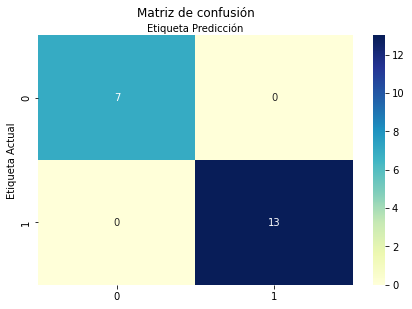

In [57]:
#Mapa de calor de la Matriz de confusion
def confusion(Matriz_confusion):
    nombre_clase=[0,1]
    fig,ax= plt.subplots()
    tick_marks=np.arange(len(nombre_clase))
    plt.xticks(tick_marks,nombre_clase)
    plt.yticks(tick_marks,nombre_clase)

    sns.heatmap(pd.DataFrame(Matriz_confusion),annot=True,cmap='YlGnBu',fmt='g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title("Matriz de confusión",y=1.1)
    plt.ylabel('Etiqueta Actual')
    plt.xlabel('Etiqueta Predicción')
    #plt.savefig('confusion1.eps',format='eps',dpi=1200)
confusion(Matriz_confusion)

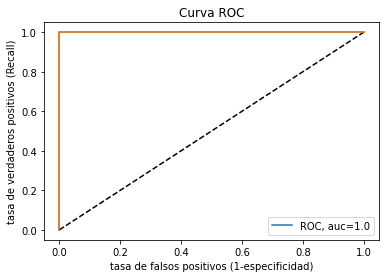

In [58]:
#Lo que estamos viendo es exactamente la curva ROC del clasificador. Y nos da bastante información: en primer lugar nos dice que aumentando o disminuyendo lo suficiente 
#el threshold podemos conseguir que nuestro algoritmo de clasificación alcance un TPR o un FPR casi perfecto.
#Cuando AUC es 0.7, significa que hay 70% de probabilidad de que el modelo pueda distinguir entre clase positiva y clase negativa. Esta es la peor situación.
#Cuando el AUC es aproximadamente 0.5, el modelo no tiene capacidad de discriminación para distinguir entre clase positiva y clase negativa.

y_pred_prob= Arbol2.predict_proba(X_test)[:,1]
fpr_1, tpr_1,tresholds1= roc_curve(y_test,y_pred_prob)
auc_score_1 = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr_1,tpr_1,label="ROC, auc="+str(round(auc_score_1,2)))
plt.legend(loc=4)
plt.plot([0,1],[0,1],'k--')
plt.title("Curva ROC")
plt.plot(fpr_1,tpr_1,label='Regresión Logistica')
plt.xlabel('tasa de falsos positivos (1-especificidad)')
plt.ylabel('tasa de verdaderos positivos (Recall)')
#plt.savefig('roc1.eps',format='eps', dpi=1200,transparent=True)
plt.show()

Regresión Logística: f1=1.000 auc=1.000


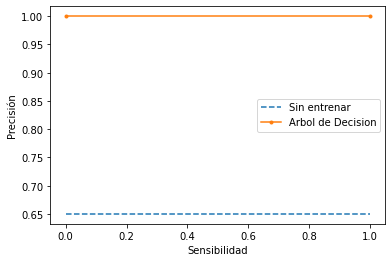

In [61]:
# predecimos probabilidades
y_pred_prob= Arbol2.predict_proba(X_test)[:,1]
# Sacamos los valores
yhat = Arbol2.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_prob)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# Resumimos 
print('Regresión Logística: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# trazar las curvas de recuperación de precisión
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
plt.plot(lr_recall, lr_precision, marker='.', label='Arbol de Decision')
#Etiquetas de ejes
plt.xlabel('Sensibilidad')
plt.ylabel('Precisión')
#plt.savefig('recall.eps',format='eps', dpi=1200,transparent=True)
plt.legend()
plt.show()




#Visualización

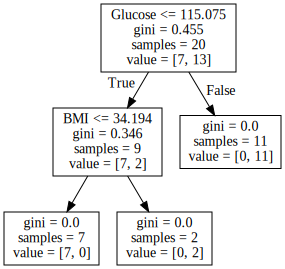

In [60]:
import graphviz
dot_data = export_graphviz(Arbol2,feature_names=variables_evaluadas)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
grafico=graphviz.Source(dot_data)
grafico
